In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,Y=make_blobs(n_samples=400,n_features=2,centers=5,random_state=3)

In [3]:
print(X.shape,Y.shape)

(400, 2) (400,)


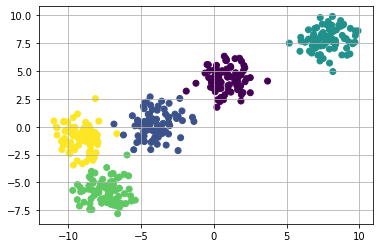

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.grid(True)
plt.show()

In [10]:
# basically we have created a dictionary in which we have placed 5 clusters with their respective centres, color and the points of nearest house
k=5
color=["green","red","blue","yellow","orange"]
clusters={}
for i in range(k):
    center=10*(2*np.random.random((X.shape[1],))-1)
    points=[]
    cluster={"center":center,"points":points,"colors":color[i]}
    clusters[i]=cluster

In [12]:
print(clusters)

{0: {'center': array([6.55681843, 1.04082042]), 'points': [], 'colors': 'green'}, 1: {'center': array([ 4.91393463, -0.84693994]), 'points': [], 'colors': 'red'}, 2: {'center': array([ 4.80153571, -5.83047048]), 'points': [], 'colors': 'blue'}, 3: {'center': array([-9.42063597, -6.63509196]), 'points': [], 'colors': 'yellow'}, 4: {'center': array([-3.21841435,  8.24069152]), 'points': [], 'colors': 'orange'}}


In [15]:
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

In [47]:
# Assign every data point to one of the cluster
def assignPointsToClusters(clusters): # E Step : Expectation Step
    for i in range(X.shape[0]):
        curr_x=X[i]
        dis=[]
        for kx in range(k):
            d=distance(curr_x,clusters[kx]['center'])
            dis.append(d)
        curr_cluster=np.argmin(dis)
        clusters[curr_cluster]['points'].append(curr_x)
# M step-> we updata every cluster centers according to the mean of the points in it
def updateClusters(clusters):
    for kx in range(k):
        pts=np.array(clusters[kx]['points'])
        if pts.shape[0]>0:
            uk=pts.mean(axis=0)
            clusters[kx]['center']=uk
            clusters[kx]['points']=[]
def plotClusters(clusters):
    for kx in range(k):
        #print(len(clusters[kx]['points']))
        pts=np.array(clusters[kx]['points'])
       # print(pts.shape)
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[kx]['colors'])
        except:
            pass
        # plot the cluster center
        uk=clusters[kx]['center']
        plt.scatter(uk[0],uk[1],color='black',marker='*')
    


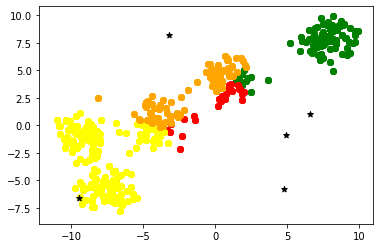

In [48]:
plotClusters(clusters)

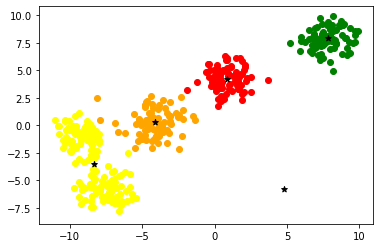

In [55]:
assignPointsToClusters(clusters)
plotClusters(clusters)
updateClusters(clusters)

# Kmeans++

In [59]:
from sklearn.cluster import KMeans

In [70]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X,Y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
centers=kmeans.cluster_centers_

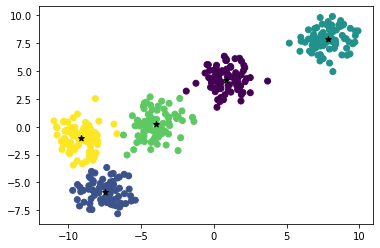

In [75]:
plt.scatter(X[:,0],X[:,1],c=pred)
plt.scatter(centers[:,0],centers[:,1],color='black',marker='*')
plt.show()

In [74]:
pred=kmeans.labels_
print(pred)

[2 4 1 2 1 3 1 4 1 0 4 3 1 4 3 1 2 0 2 4 4 0 3 3 0 4 1 0 4 4 3 4 3 4 1 1 0
 3 4 0 0 2 3 3 4 2 2 0 2 3 2 3 1 0 0 1 1 4 1 1 1 2 2 2 0 0 3 1 3 3 4 2 1 0
 2 4 0 1 4 1 2 4 0 0 0 3 0 1 2 0 0 1 3 4 2 4 4 2 1 3 2 1 2 1 2 3 0 1 4 0 4
 2 0 3 2 2 0 4 2 3 0 0 2 3 2 3 2 0 3 4 4 2 1 0 0 3 4 0 3 4 3 4 0 1 0 3 0 4
 3 1 2 3 2 2 0 0 3 4 3 4 4 3 3 2 1 1 3 3 2 2 1 1 1 3 3 2 1 3 3 2 0 4 4 4 1
 0 0 3 4 3 3 2 1 1 2 4 3 4 0 1 3 1 0 3 4 0 2 1 1 2 0 4 4 0 0 2 2 4 1 0 0 3
 4 1 0 2 0 3 0 1 2 1 3 1 2 0 4 2 1 4 4 4 0 0 4 0 2 1 0 0 1 2 1 2 1 1 4 1 1
 1 0 4 2 3 3 0 0 1 2 3 4 3 2 4 4 4 4 3 3 3 2 0 1 0 3 4 4 0 0 4 1 0 4 0 2 0
 3 0 3 4 3 2 0 4 2 2 0 0 3 4 3 4 3 2 1 4 0 2 2 3 1 1 1 2 0 3 4 2 2 2 1 0 3
 4 2 4 4 0 4 3 3 1 3 1 2 0 1 2 0 4 3 1 1 4 1 2 2 2 3 2 0 1 3 3 3 2 1 2 4 2
 4 2 1 1 2 0 3 1 3 1 2 4 4 4 0 3 1 2 4 4 3 3 4 1 3 4 1 0 2 1]


# Kmeans can still fail

In [76]:
from sklearn.datasets import make_moons, make_circles

In [78]:
X,Y=make_moons(n_samples=200,noise=0.10)

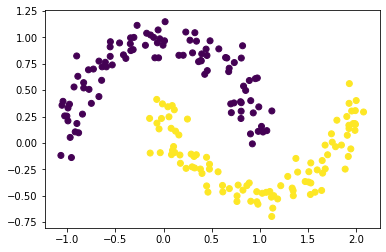

In [79]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [87]:
km=KMeans(n_clusters=2)
km.fit(X)
centers=km.cluster_centers_
labels=km.labels_

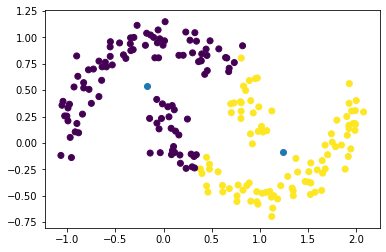

In [90]:
plt.scatter(X[:,0],X[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [91]:
from sklearn.cluster import DBSCAN

In [97]:
dbs=DBSCAN(eps=0.2,min_samples=5)

In [98]:
dbs.fit(X)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [99]:
Y=dbs.fit_predict(X)

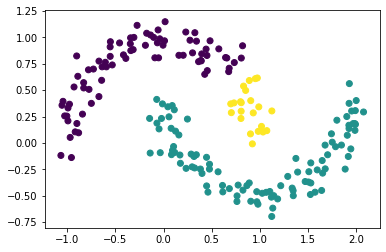

In [100]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()